In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import norm
from sklearn import datasets
from sklearn.model_selection import train_test_split
from scipy.stats import multivariate_normal


In [124]:
# import iris dataset 
iris = datasets.load_iris()
X = iris.data  
Y = iris.target

# stratify dataset accoring to flower categories
x_train, x_test, y_train, y_test = train_test_split( X, Y, test_size=0.20, random_state=4, stratify=Y )

# verify
(unique, counts) = np.unique(y_train, return_counts=True)
frequencies = np.asarray((unique, counts)).T
print(f'Frequencies of each dataset : \n{frequencies}')


Frequencies of each dataset : 
[[ 0 40]
 [ 1 40]
 [ 2 40]]


In [ ]:
NO_OF_CATEGORIES = len(unique)
NO_OF_FEATURE = X.shape[1]
NO_OF_TEST_DATA = y_test.size

In [ ]:
likelihood_pdf_params = np.empty(shape = (3, 4, 2)) # (categories, features, distribution parameters : mean, variance)
prior_probs = np.empty(shape = (3, 1)) # (categories, prior probability)

for c_index in range(0, NO_OF_CATEGORIES) :

  c_data = np.array([x for x in X[np.where(Y==c_index)]]) # (50, 4)
  c_data_cnt = c_data.shape[0] 
  prior_probs[c_index] = c_data_cnt/Y.size

  for f_index in range(0, NO_OF_FEATURE) :
    c_f_data = c_data[:, f_index] # (4,)
    mean = np.mean(c_f_data) # ()
    var = np.var(c_f_data) # ()
    likelihood_pdf_params[c_index][f_index][0] = mean
    likelihood_pdf_params[c_index][f_index][1] = var

print(f'Likelihood distribution parameters :\n {likelihood_pdf_params}')
print(f'Prior Probabilities : \n {prior_probs}')

Likelihood distribution parameters :
 [[[5.006    0.121764]
  [3.428    0.140816]
  [1.462    0.029556]
  [0.246    0.010884]]

 [[5.936    0.261104]
  [2.77     0.0965  ]
  [4.26     0.2164  ]
  [1.326    0.038324]]

 [[6.588    0.396256]
  [2.974    0.101924]
  [5.552    0.298496]
  [2.026    0.073924]]]
Prior Probabilities : 
 [[0.33333333]
 [0.33333333]
 [0.33333333]]


In [ ]:

posterior_probs = np.empty(shape = (NO_OF_TEST_DATA, NO_OF_CATEGORIES)) # (30, 3) = (test data : 20%, categories : 3)

for index in range(0, NO_OF_TEST_DATA) :
  data = x_test[index] # (4,) : Features
  label = y_test[index] # ()

  for c_index in range(0, NO_OF_CATEGORIES) : 
    likelihood_params = likelihood_pdf_params[c_index] # (4, 2) = (featues , dist info = mean, var)
    likelihood_means = likelihood_params[:,0] # (4,) = Features
    likelihood_var = likelihood_params[:,1] # (4,) = Features

    """Naive Bayes"""
    independent_posterior_probs = norm.pdf(x = data, loc = likelihood_means, scale = likelihood_var) # (4, 1)
    p_c = prior_probs[c_index]
    posterior_probs[index][c_index] = np.prod(independent_posterior_probs)*p_c

y_pred = posterior_probs.argmax(axis = 1)
number_of_success = sum(y_pred == y_test)
accuracy = (number_of_success/NO_OF_TEST_DATA)*100
print(f'Accuracy : {accuracy}')


    



Accuracy : 96.66666666666667


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2]


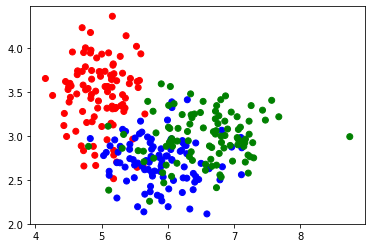

In [ ]:
generated_label = 0
generated_data = np.empty((1,5)) * np.nan
for cat_dis_param in likelihood_pdf_params :
  mean = cat_dis_param[:,0]
  var = cat_dis_param[:,1]
  cov = np.diag(var)
  
  """reverse sampling"""
  x_generated = multivariate_normal.rvs(mean, cov, 100) 
  x_generated = np.append(x_generated, (np.ones((100,1),dtype=int))*int(generated_label), axis=1)
  generated_data = np.concatenate((generated_data, x_generated), axis=0)
  generated_label = generated_label + 1


# print(generated_data)
plt.figure()
cmap = np.array(['red','blue','green'])
labels = np.array(generated_data[1:300,4])
print(labels.astype(int))
plt.scatter(generated_data[1:300,0], generated_data[1:300,1], c=cmap[labels.astype(int)])
plt.show()








Reference :

https://www.kaggle.com/anniepyim/essential-classification-algorithms-explained


https://www.anotherbookondatascience.com/chapter4.html

https://www.delftstack.com/api/scipy/scipy-scipy.stats.multivariate_normal-method/